In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('Telco Customer Churn.csv')
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Replacing blanks with 0 in column TotalCharges as tenure is 0

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

##### replacing SeniorCitizen column values : 0 with no and 1 with yes

In [73]:

def con(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(con)
print(df['SeniorCitizen'].value_counts())

SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df["customerID"].duplicated().sum()

0

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## KPI
### 1. Churn Rate

In [35]:
total_customers = len(df)
churned_customers = df[df['Churn'] == 'Yes'].shape[0]
churn_rate = round((churned_customers / total_customers) * 100,2)
churn_rate

26.54

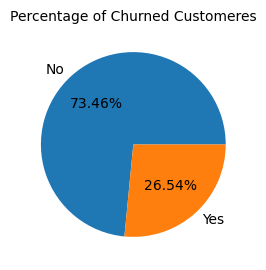

In [37]:
plt.figure(figsize = (3,3))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

#### From this pie chart, we can see that out of 7,043 customers, 1,869 (26.54%) have churned. This shows that about one in four customers leave the company.


### 2. Average Monthly Charges

In [39]:
avg_monthly_charges = (
    df.groupby('Churn')['MonthlyCharges']
      .mean()
      .reset_index()
)

avg_monthly_charges

,Churn,MonthlyCharges
0,No,61.265124
1,Yes,74.441332


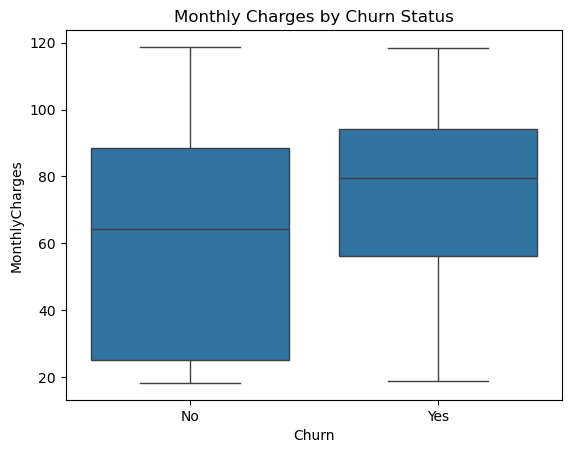

In [40]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

#### Customers who churned have higher average monthly charges compared to those who stayed, indicating a possible link between cost and churn.



### 3. Average Tenure

In [43]:
avg_tenure = df['tenure'].mean()
avg_tenure

32.37114865824223

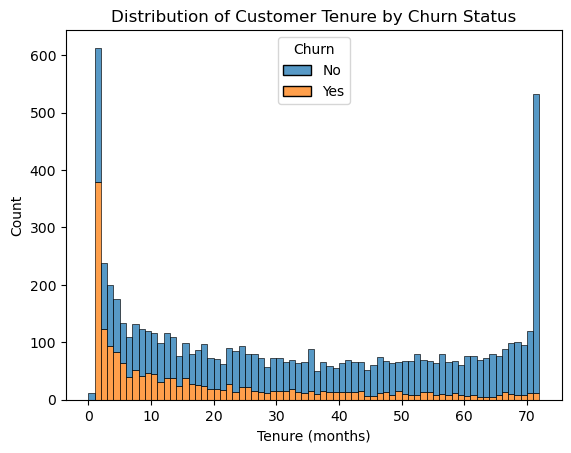

In [47]:
sns.histplot(
    data=df,
    x='tenure',
    hue='Churn',
    bins=72,
    multiple='stack' 
)

plt.title('Distribution of Customer Tenure by Churn Status')
plt.xlabel('Tenure (months)')
plt.show()


#### Churn risk is highest among new customers, while customers with longer tenure show significantly lower churn

### 4. Churn Rate by Segment

In [50]:
def churn_rate_by_segment(df, col):
    return (
        df.groupby(col)
          .apply(lambda x: (x['Churn'] == 'Yes').mean() * 100)
          .reset_index(name='Churn Rate (%)')
    )

churn_rate_by_segment(df, 'Contract')

C:\Users\shikh\AppData\Local\Temp\ipykernel_40964\3155532489.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['Churn'] == 'Yes').mean() * 100)


,Contract,Churn Rate (%)
0,Month-to-month,42.709677
1,One year,11.269518
2,Two year,2.831858


C:\Users\shikh\AppData\Local\Temp\ipykernel_40964\3155532489.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['Churn'] == 'Yes').mean() * 100)


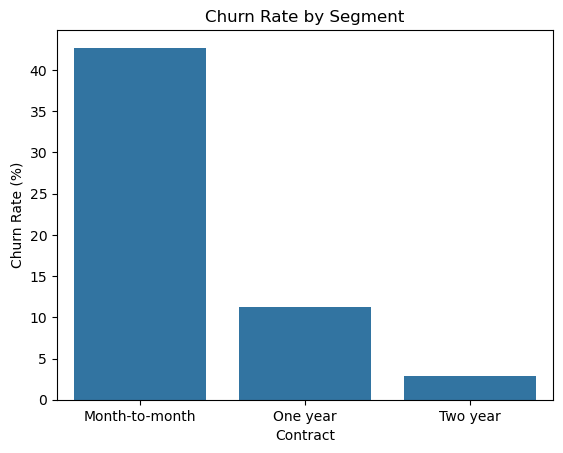

In [60]:
contract_churn = churn_rate_by_segment(df, 'Contract')

sns.barplot(x='Contract', y='Churn Rate (%)', data=contract_churn)
plt.title('Churn Rate by Segment')
plt.show()

#### Churn is highest among Month-to-month customers (42.71%) and lowest for Two-year contracts (2.83%), showing that longer contracts help retain customers.


### 5.Revenue at Risk

In [52]:
revenue_at_risk = df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'].sum()
revenue_at_risk

139130.85

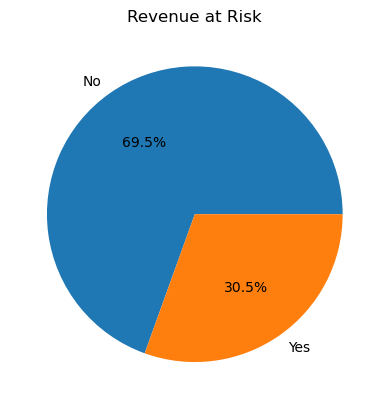

In [59]:
revenue_data = df.groupby('Churn')['MonthlyCharges'].sum().reset_index()
plt.pie(
    revenue_data['MonthlyCharges'],
    labels=revenue_data['Churn'],
    autopct='%1.1f%%'
)
plt.title('Revenue at Risk')
plt.show()

#### About **30.5%** of monthly revenue (**$139,130.85**) comes from customers who have churned, showing the significant revenue at risk.


## Summary of key metrics including churn, average charges, tenure, and revenue at risk.

In [56]:
kpi_summary = {
    'Total Customers': total_customers,
    'Churn Rate (%)': round(churn_rate, 2),
    'Avg Monthly Charges (Churned)': df[df['Churn']=='Yes']['MonthlyCharges'].mean(),
    'Avg Monthly Charges (Retained)': df[df['Churn']=='No']['MonthlyCharges'].mean(),
    'Avg Tenure (months)': round(avg_tenure, 1),
    'Revenue at Risk': round(revenue_at_risk, 2)
}

pd.DataFrame(kpi_summary, index=[1])

,Total Customers,Churn Rate (%),Avg Monthly Charges (Churned),Avg Monthly Charges (Retained),Avg Tenure (months),Revenue at Risk
1,7043,26.54,74.441332,61.265124,32.4,139130.85


### Exploring reasons behind Churn
### *Churn by Gender

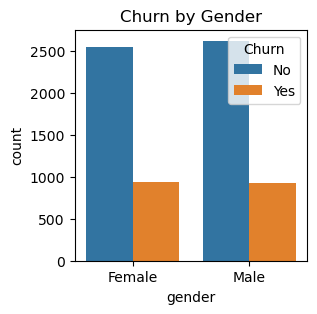

In [61]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

#### The churn rate is similar for both genders, indicating that gender does not have a significant impact on customer churn.


### *Churn by Senior Citizen

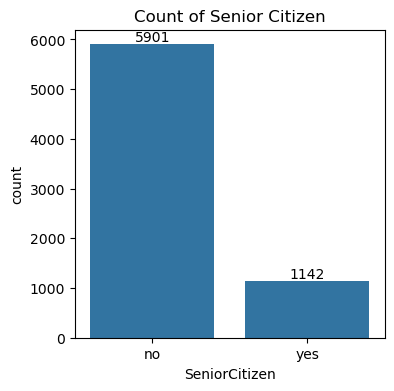

In [79]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Senior Citizen")
plt.show()

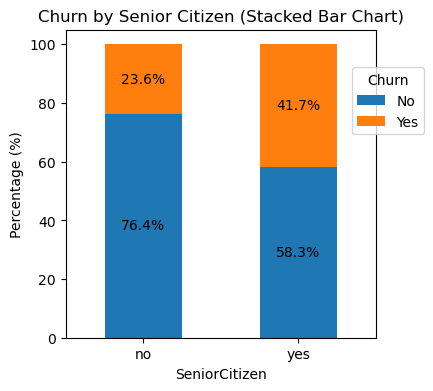

In [76]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

#### The churn rate is higher among senior citizens, with **41.7%** of seniors churning compared to **23.6%** of non-seniors, indicating age may influence customer churn.



### *Churn by Services

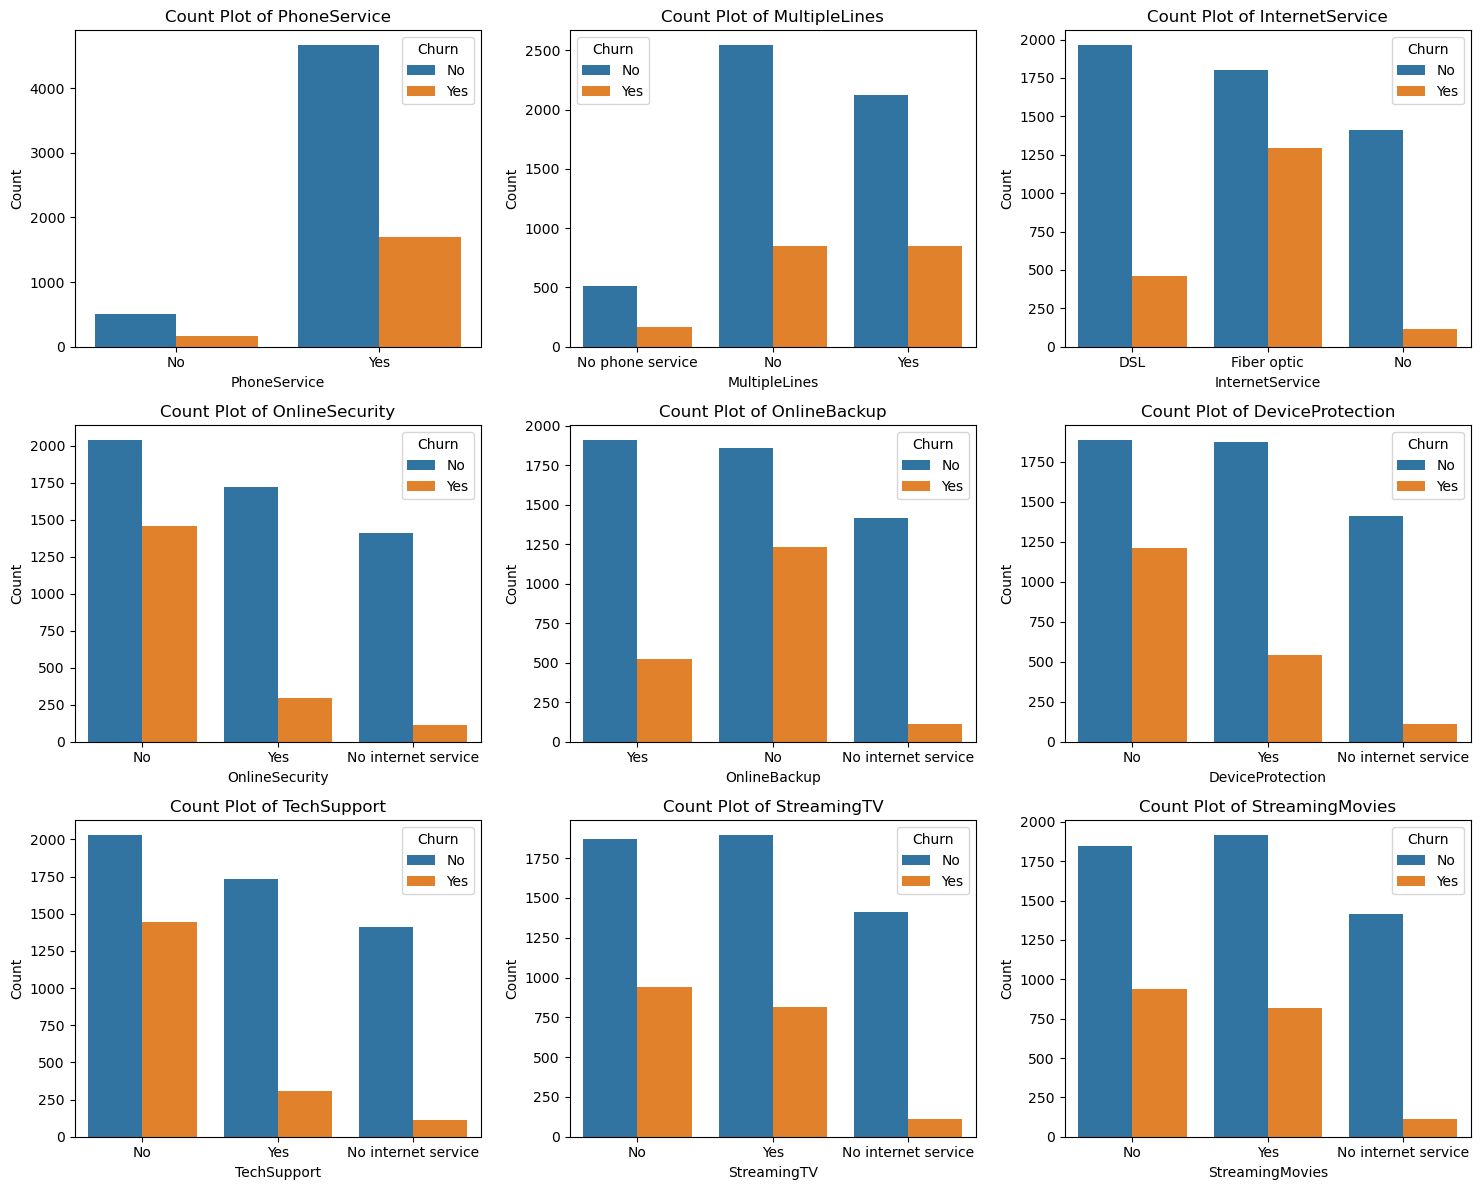

In [77]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#### The plots show how subscription to various services relates to churn. Customers without additional services like **Online Security, Tech Support, or Device Protection** tend to churn more. Similarly, those with **Internet-based services** or **streaming subscriptions** also show higher churn in some categories. This indicates that service usage and availability can influence customer retention.


### *Churn by Payment Methods

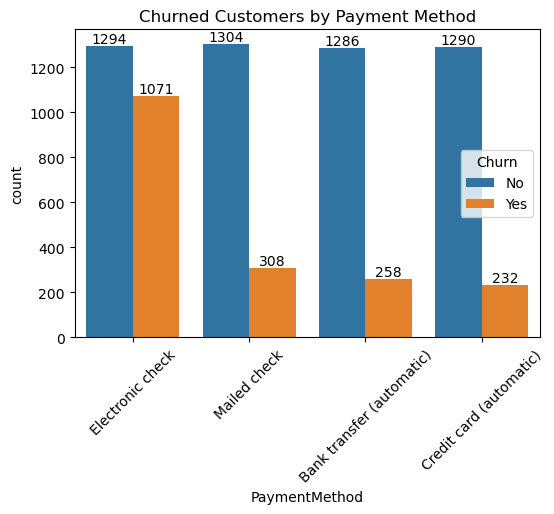

In [78]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#### Customers using **Electronic Check** have the highest churn rate, while those with **Bank Transfer or Credit Card** payments tend to stay longer. This suggests that payment method may influence customer retention.
